In [1]:
import numpy as np
import torch
from torch import nn
from d2l import torch as d2l

In [2]:
class LinearRegression(d2l.Module):  #@save
    """The linear regression model implemented with high-level APIs."""
    def __init__(self, lr):
        super().__init__()
        self.save_hyperparameters()
        self.net = nn.LazyLinear(1)
        self.net.weight.data.normal_(0, 0.01)
        self.net.bias.data.fill_(0)

In [3]:
@d2l.add_to_class(LinearRegression)  #@save
def forward(self, X):
    return self.net(X)

In [4]:
@d2l.add_to_class(LinearRegression)  #@save
def loss(self, y_hat, y):
    fn = nn.MSELoss()
    return fn(y_hat, y)

In [5]:
@d2l.add_to_class(LinearRegression)  #@save
def configure_optimizers(self):
    return torch.optim.SGD(self.parameters(), self.lr)

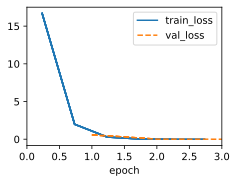

In [11]:
model = LinearRegression(lr=0.03)
data = d2l.SyntheticRegressionData(w=torch.tensor([2, -3.4]), b=4.2, num_train=1000, num_val=1000)
trainer = d2l.Trainer(max_epochs=3)
trainer.fit(model, data)

In [12]:
@d2l.add_to_class(LinearRegression) #@save
def get_w_b(self):
    return (self.net.weight.data, self.net.bias.data)

w, b = model.get_w_b()
print(f'error in estimating w: {data.w - w.reshape(data.w.shape)}')
print(f'error in estimating b: {data.b - b}')

error in estimating w: tensor([ 0.0064, -0.0085])
error in estimating b: tensor([0.0092])


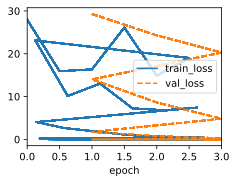

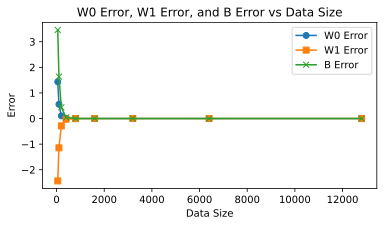

   Data Size  W0 Error  W1 Error   B Error
0         50  1.434167 -2.435413  3.462210
1        100  0.555432 -1.144884  1.638194
2        200  0.105023 -0.287162  0.437834
3        400  0.011155 -0.026757  0.040802
4        800 -0.000433 -0.000188 -0.000083
5       1600 -0.000044 -0.000029  0.000132
6       3200 -0.000044  0.000291  0.000487
7       6400 -0.000714  0.000185 -0.000548
8      12800 -0.000088 -0.000300 -0.000383


In [13]:
import pandas as pd
import matplotlib.pyplot as plt

def ex5_20220905(data_sizes, model, trainer):
    w_errs = list()
    b_errs = list()
    for data_size in data_sizes:
        data_size = int(data_size)
        data = d2l.SyntheticRegressionData(w=torch.tensor([2, -3.4]), b=4.2,
                                           num_train=data_size, num_val=data_size)
        trainer.fit(model, data)
        w, b = model.get_w_b()
        w_errs.append(data.w - w.reshape(data.w.shape))
        b_errs.append(data.b - b)
    return w_errs, b_errs


# Generate the logarithmic growth sequence
data_sizes = [50 * 2**i for i in range(9)]
print("Logarithmic Growth Sequence:", data_sizes)
model = LinearRegression(lr=0.03)
trainer = d2l.Trainer(max_epochs=3)
w_errs, b_errs = ex5_20220905(data_sizes=data_sizes, model=model, trainer=trainer)

# split weights into each component for plotting
w0_errs = [err[0].item() for err in w_errs]
w1_errs = [err[1].item() for err in w_errs]
b_errs = [err.item() for err in b_errs]

# Create a dictionary with the data
data = {
    'Data Size': data_sizes,
    'W0 Error': w0_errs,
    'W1 Error': w1_errs,
    'B Error': b_errs
}

# Convert the dictionary to a DataFrame
df = pd.DataFrame(data)

# Plotting
plt.figure(figsize=(6, 3))

# Plot W0 Error
plt.plot(data_sizes, w0_errs, label='W0 Error', marker='o')

# Plot W1 Error
plt.plot(data_sizes, w1_errs, label='W1 Error', marker='s')

# Plot B Error
plt.plot(data_sizes, b_errs, label='B Error', marker='x')

# Adding labels and title
plt.xlabel('Data Size')
plt.ylabel('Error')
plt.title('W0 Error, W1 Error, and B Error vs Data Size')
plt.legend()

# Display the plot
plt.show()
print(df)

In [14]:
## exersizes 
# 1.  MSELoss(reduction="sum")
# 2. change MSELoss to Huberloss
#3. 
print(model.net.weight.grad)
#4 increase in epoochs improves to certain time. lr increase up to .1 better, but too high is bad... lower is slower convergence
# 5 increasing samples increases accurancy and converges faster. log is better scale for faster speed ups

tensor([[-0.0021,  0.0040]])


In [15]:

torch.log(torch.arange(2,20))*1000

tensor([ 693.1472, 1098.6123, 1386.2943, 1609.4380, 1791.7595, 1945.9102,
        2079.4417, 2197.2246, 2302.5852, 2397.8953, 2484.9067, 2564.9492,
        2639.0574, 2708.0503, 2772.5886, 2833.2134, 2890.3718, 2944.4390])